# Exercizes on clustering

Here you can find a program to read a data file in csv format.

The data file is in CSV format and it has in the first row the names of the features (separated by comma).
    
For each remaining row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
import pandas as pd
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data
file_path="sample_data/"
file_name1="3-clusters.csv"
df1 = pd.read_csv(join(file_path, file_name1))
feature_names1=df1.columns.tolist()
dataset1 = df1.values
file_name2="dataset-DBSCAN.csv"
dataset2 = pd.read_csv(join(file_path, file_name2))
df2 = pd.read_csv(join(file_path, file_name2))
feature_names2=df2.columns.tolist()
dataset2 = df2.values
file_name3="CURE-complete.csv"
df3 = pd.read_csv(join(file_path, file_name3))
feature_names3=df3.columns.tolist()
dataset3 = df3.values

The following program plots the dataset n.1

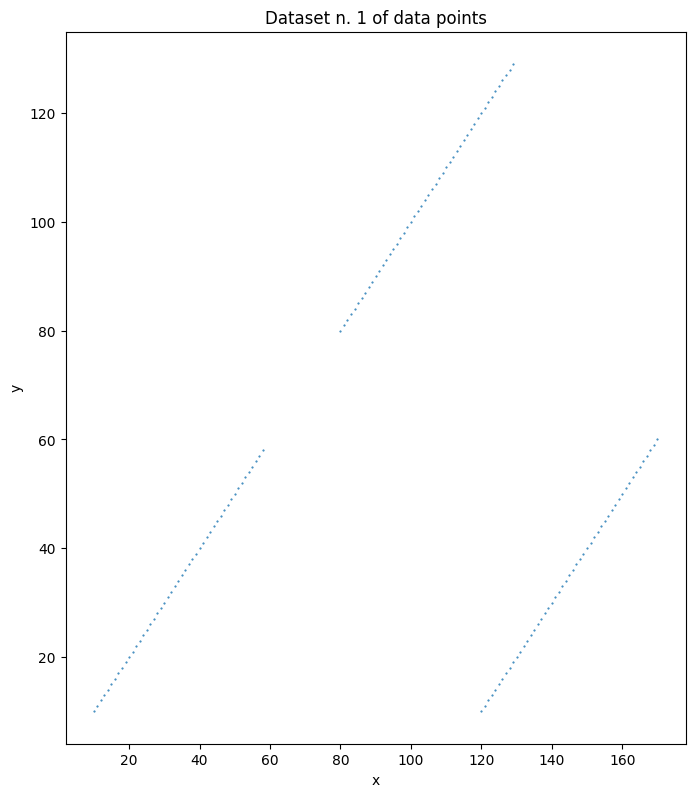

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(dataset1[:,0], dataset1[:,1], '.',markersize=1)
plt.show()

The following is the program for plotting the dataset n.2

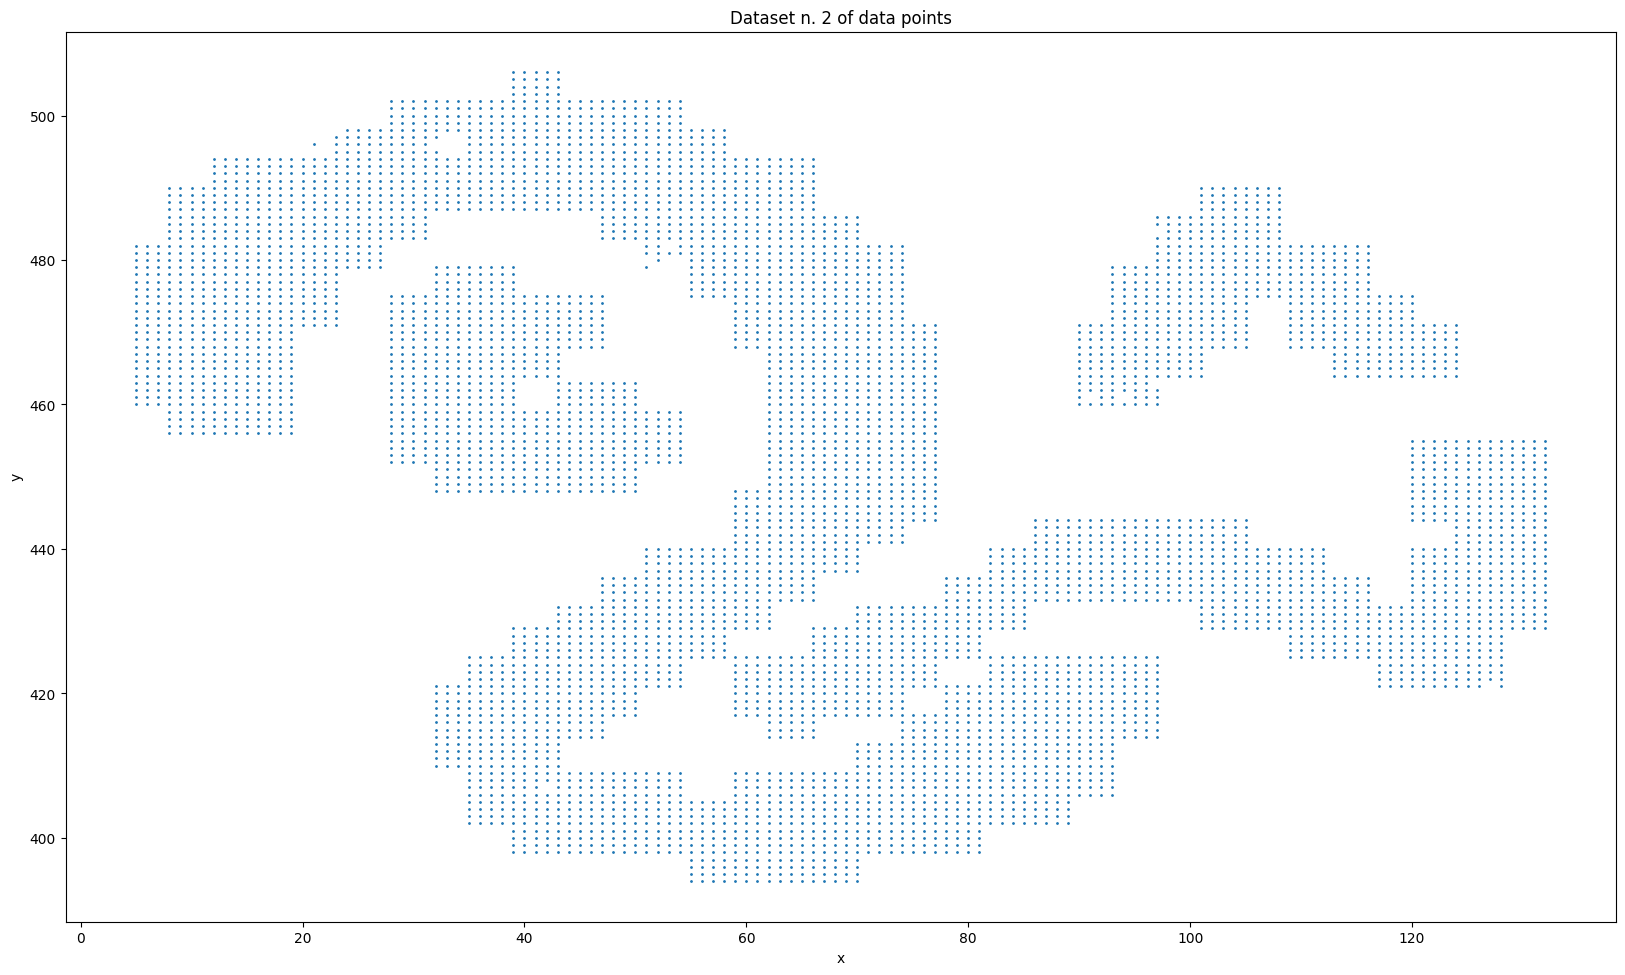

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(dataset2[:,0], dataset2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

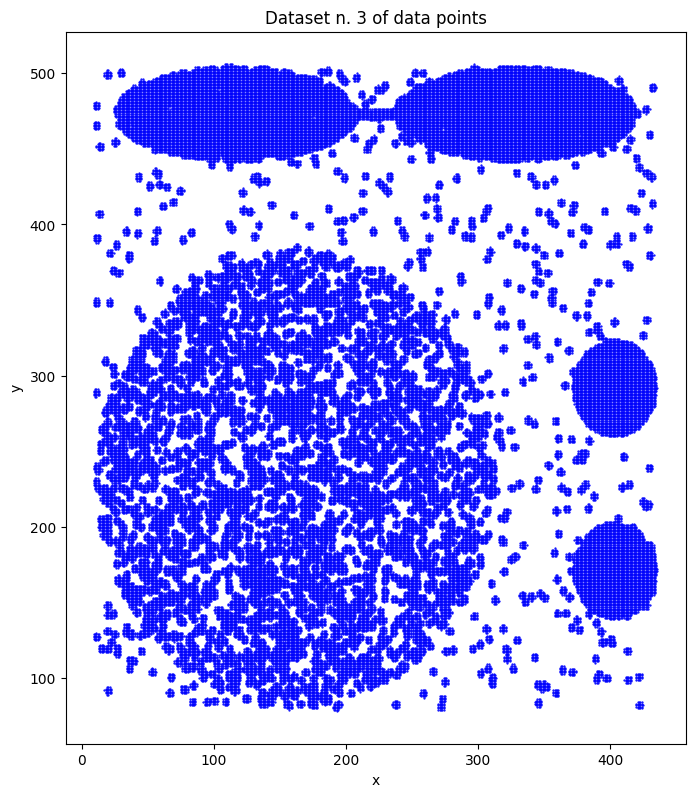

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(dataset3[:,0], dataset3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means.
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3.

In [5]:
from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(dataset1)

i=0
nrighe_dataset1=dataset1.shape[0]

for i in range(nrighe_dataset1):
    print("Example n."+str(i)+"=("+str(dataset1[i,0])+","+str(dataset1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10,10)
in cluster n.1
Example n.1=(11,11)
in cluster n.1
Example n.2=(12,12)
in cluster n.1
Example n.3=(13,13)
in cluster n.1
Example n.4=(14,14)
in cluster n.1
Example n.5=(15,15)
in cluster n.1
Example n.6=(16,16)
in cluster n.1
Example n.7=(17,17)
in cluster n.1
Example n.8=(18,18)
in cluster n.1
Example n.9=(19,19)
in cluster n.1
Example n.10=(20,20)
in cluster n.1
Example n.11=(21,21)
in cluster n.1
Example n.12=(22,22)
in cluster n.1
Example n.13=(23,23)
in cluster n.1
Example n.14=(24,24)
in cluster n.1
Example n.15=(25,25)
in cluster n.1
Example n.16=(26,26)
in cluster n.1
Example n.17=(27,27)
in cluster n.1
Example n.18=(28,28)
in cluster n.1
Example n.19=(29,29)
in cluster n.1
Example n.20=(30,30)
in cluster n.1
Example n.21=(31,31)
in cluster n.1
Example n.22=(32,32)
in cluster n.1
Example n.23=(33,33)
in cluster n.1
Example n.24=(34,34)
in cluster n.1
Example n.25=(35,35)
in cluster n.1
Example n.26=(36,36)
in cluster n.1
Example n.27=(37,37)
in cluster n.1
Ex

We plot the clusters with a pandas data frame:

In [6]:
clustering_results_dataset1 = []

for i in range(nrighe_dataset1):

    clustering_results_dataset1.append({
        'Instance': i,
        feature_names1[0]: dataset1[i,0],
        feature_names1[1]: dataset1[i,1],
        'Cluster n.': kmeans1.labels_[i]
    })

results_df1 = pd.DataFrame(clustering_results_dataset1 )
print(results_df1.to_string(index=False, float_format='%.1f'))

 Instance   x   y  Cluster n.
        0  10  10           1
        1  11  11           1
        2  12  12           1
        3  13  13           1
        4  14  14           1
        5  15  15           1
        6  16  16           1
        7  17  17           1
        8  18  18           1
        9  19  19           1
       10  20  20           1
       11  21  21           1
       12  22  22           1
       13  23  23           1
       14  24  24           1
       15  25  25           1
       16  26  26           1
       17  27  27           1
       18  28  28           1
       19  29  29           1
       20  30  30           1
       21  31  31           1
       22  32  32           1
       23  33  33           1
       24  34  34           1
       25  35  35           1
       26  36  36           1
       27  37  37           1
       28  38  38           1
       29  39  39           1
       30  40  40           1
       31  41  41           1
       32 

In the following program we plot the clusters

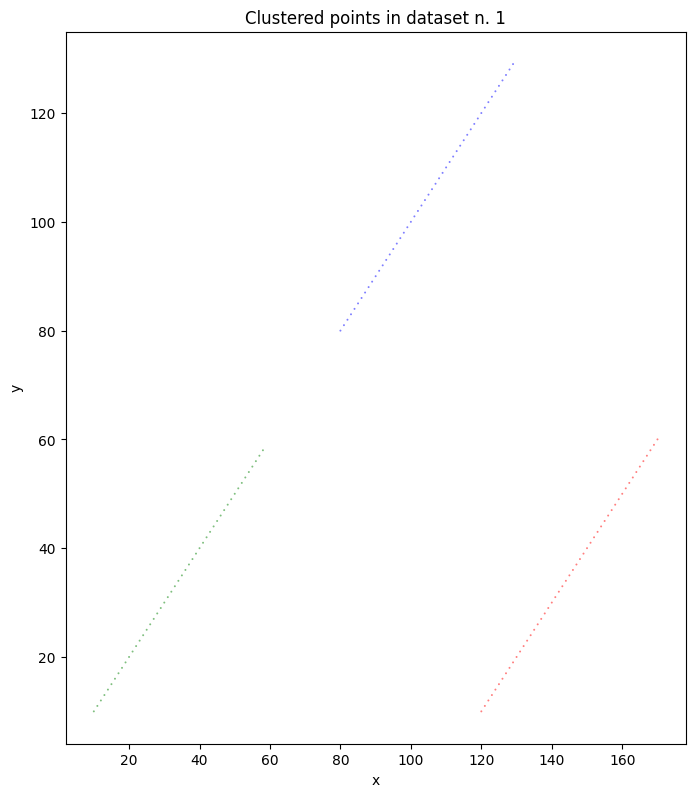

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [dataset1[i,0] for i in range(nrighe_dataset1) if kmeans1.labels_[i]==clu]
    data_list_y = [dataset1[i,1] for i in range(nrighe_dataset1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from os.path import join

# ============================================
# INPUT ATTESI
# - dataset2: numpy array (n_samples, 2)
# - feature_names2: lista di nomi feature (opzionale)
# ============================================

def run_kmeans_on_dataset2(dataset2: np.ndarray, k: int = 3, seed: int = 5, out_file: str = "kmeans_dataset2_results.npz"):
    """
    Alleno KMeans su dataset2, stampo cluster assegnato a ogni esempio e salvo risultati su file.
    """
    if not isinstance(dataset2, np.ndarray):
        raise TypeError("dataset2 deve essere un numpy.ndarray")
    if dataset2.ndim != 2 or dataset2.shape[1] != 2:
        raise ValueError("dataset2 deve avere shape (n_samples, 2)")

    np.random.seed(seed)

    # n_init esplicitato per evitare warning / differenze tra versioni sklearn
    kmeans2 = KMeans(n_clusters=k, random_state=0, n_init=10).fit(dataset2)

    n_rows = dataset2.shape[0]

    for i in range(n_rows):
        print(f"Example n.{i}=({dataset2[i,0]},{dataset2[i,1]})")
        print(f"in cluster n.{kmeans2.labels_[i]}")

    # salvo labels e centroidi per riuso nel plot
    np.savez(
        out_file,
        labels=kmeans2.labels_,
        centers=kmeans2.cluster_centers_,
        k=np.array([k]),
        seed=np.array([seed])
    )

    print(f"\n✅ Risultati salvati in: {out_file}")
    return kmeans2

file_path="../datasets/clustering"
file_name2="dataset-DBSCAN.csv"
dataset2 = pd.read_csv(join(file_path, file_name2))
df2 = pd.read_csv(join(file_path, file_name2))
feature_names2=df2.columns.tolist()
dataset2 = df2.values

run_kmeans_on_dataset2(dataset2)


Example n.0=(5,482)
in cluster n.1
Example n.1=(5,481)
in cluster n.1
Example n.2=(5,480)
in cluster n.1
Example n.3=(5,479)
in cluster n.1
Example n.4=(5,478)
in cluster n.1
Example n.5=(5,477)
in cluster n.1
Example n.6=(5,476)
in cluster n.1
Example n.7=(5,475)
in cluster n.1
Example n.8=(5,474)
in cluster n.1
Example n.9=(5,473)
in cluster n.1
Example n.10=(5,472)
in cluster n.1
Example n.11=(5,471)
in cluster n.1
Example n.12=(5,470)
in cluster n.1
Example n.13=(5,469)
in cluster n.1
Example n.14=(5,468)
in cluster n.1
Example n.15=(5,467)
in cluster n.1
Example n.16=(5,466)
in cluster n.1
Example n.17=(5,465)
in cluster n.1
Example n.18=(5,464)
in cluster n.1
Example n.19=(5,463)
in cluster n.1
Example n.20=(5,462)
in cluster n.1
Example n.21=(5,461)
in cluster n.1
Example n.22=(5,460)
in cluster n.1
Example n.23=(6,482)
in cluster n.1
Example n.24=(6,481)
in cluster n.1
Example n.25=(6,480)
in cluster n.1
Example n.26=(6,479)
in cluster n.1
Example n.27=(6,478)
in cluster n.1
Ex

KMeans(n_clusters=3, n_init=10, random_state=0)

In the following you have to plot clustering results on dataset2.

**Answer:**
how do you explain what it happens?


Nel dataset2, applicando K-Means (con *k* fissato), i punti vengono assegnati ai cluster in base alla distanza euclidea dai centroidi: ogni punto finisce nel cluster del centroide più vicino.
Di conseguenza, il risultato che osservo nel grafico è una partizione dello spazio in regioni “a celle”, separate da confini lineari: questo sumccede perché K-Means sta inimizzando la somma delle distanze quadratiche intra-cluster (inertia) e quindi tende a creare cluster compatti e circa “sferici” (o comunque convessi) rispetto alla metrica euclidea.

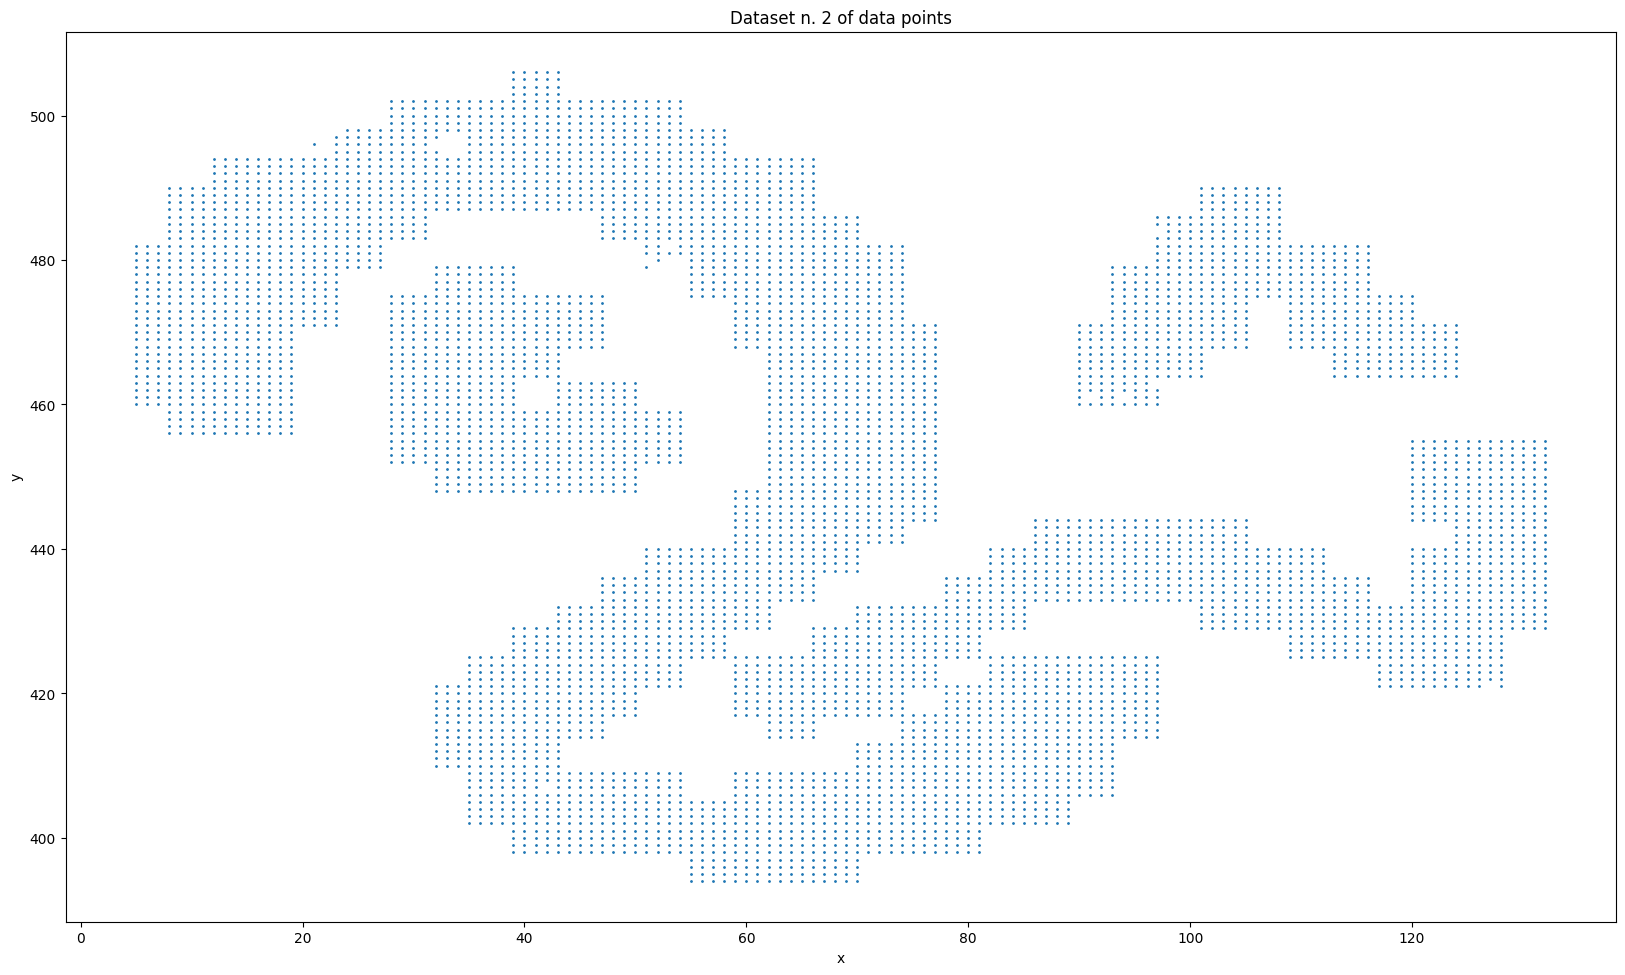

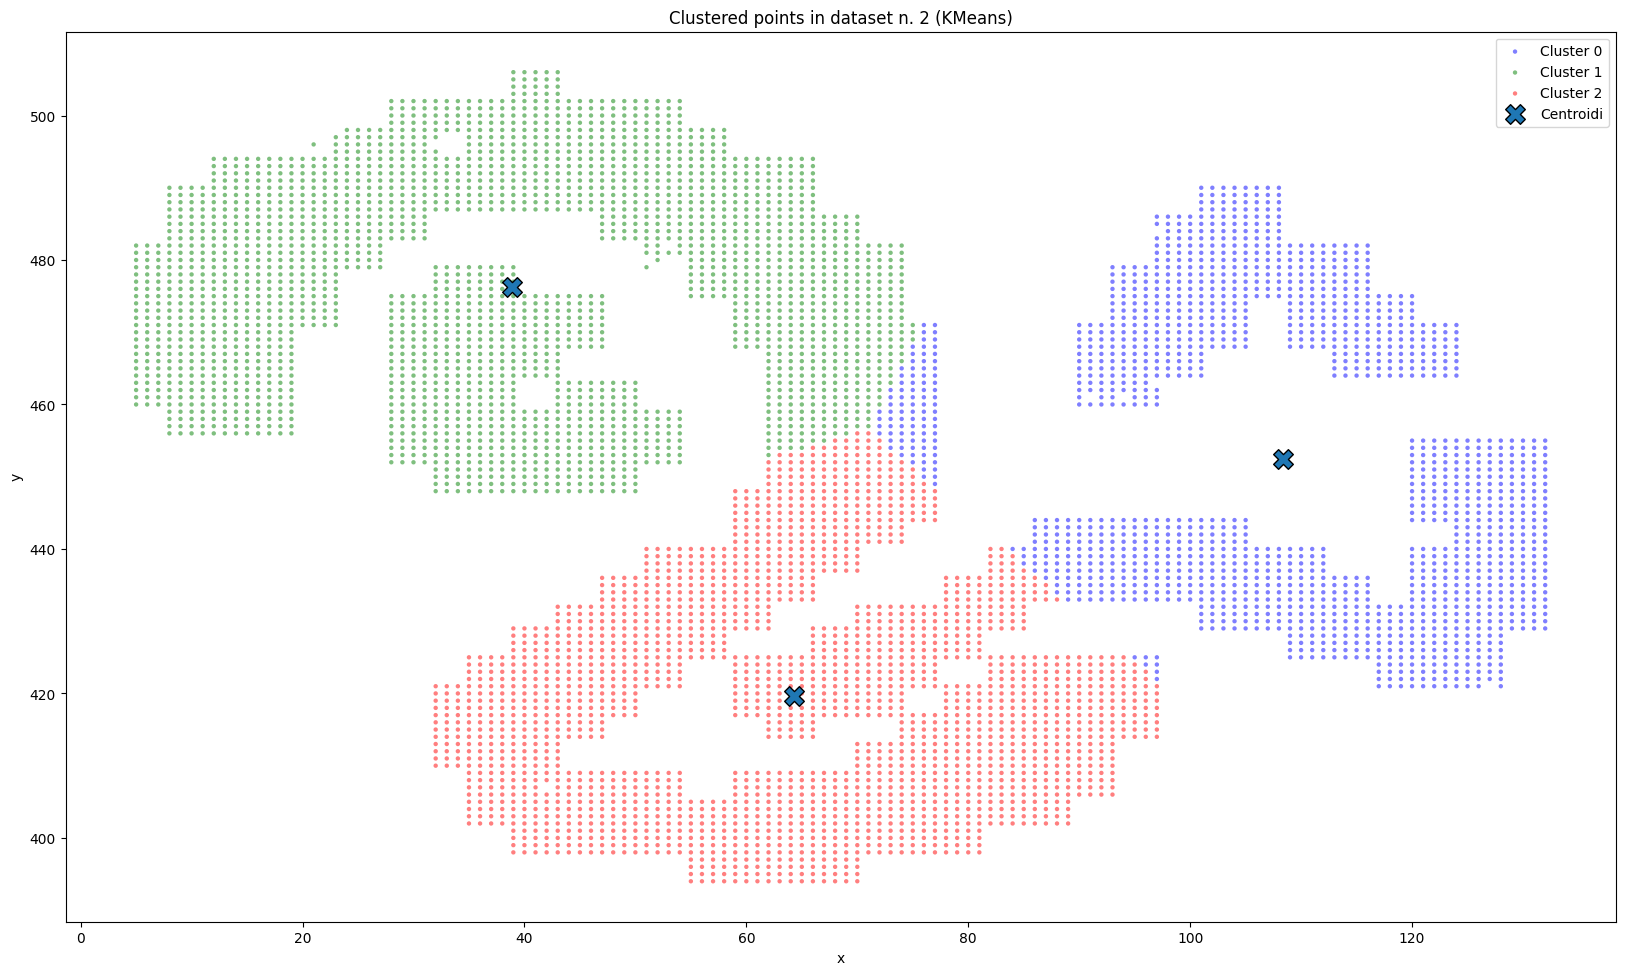

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset2_raw(dataset2: np.ndarray, feature_names2=None):
    """
    Plot del dataset2 non clusterizzato.
    """
    if feature_names2 is None:
        feature_names2 = ["x", "y"]

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)

    ax.set_title("Dataset n. 2 of data points")
    ax.set_xlabel(feature_names2[0])
    ax.set_ylabel(feature_names2[1])

    plt.plot(dataset2[:, 0], dataset2[:, 1], ".", markersize=2)
    plt.show()


def plot_dataset2_clustered(dataset2: np.ndarray, results_file: str = "kmeans_dataset2_results.npz", feature_names2=None):
    """
    Plot del dataset2 clusterizzato usando labels/centroidi salvati.
    """
    if feature_names2 is None:
        feature_names2 = ["x", "y"]

    data = np.load(results_file, allow_pickle=True)
    labels = data["labels"]
    centers = data["centers"]
    k = int(data["k"][0])

    n_rows = dataset2.shape[0]
    if labels.shape[0] != n_rows:
        raise ValueError("Numero labels diverso dal numero di righe di dataset2. Hai cambiato dataset2 dopo il fit?")

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)

    ax.set_title("Clustered points in dataset n. 2 (KMeans)")
    ax.set_xlabel(feature_names2[0])
    ax.set_ylabel(feature_names2[1])

    # lista colori (come nel tuo esempio)
    color = ["b", "g", "r", "c", "m", "y", "k"]

    for clu in range(k):
        data_list_x = [dataset2[i, 0] for i in range(n_rows) if labels[i] == clu]
        data_list_y = [dataset2[i, 1] for i in range(n_rows) if labels[i] == clu]
        plt.scatter(data_list_x, data_list_y, s=10, edgecolors="none", c=color[clu % len(color)], alpha=0.5, label=f"Cluster {clu}")

    # centroidi
    plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200, edgecolors="black", linewidths=1.0, label="Centroidi")

    plt.legend()
    plt.show()

plot_dataset2_raw(dataset2, feature_names2)
plot_dataset2_clustered(dataset2, "kmeans_dataset2_results.npz", feature_names2)


In the following cell I propose you to perform clustering with K-means on the dataset3.

In [18]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from os.path import join

# ============================================
# INPUT ATTESI
# - dataset3: numpy array (n_samples, 2)
# - feature_names3: lista di nomi feature (opzionale)
# ============================================

def run_kmeans_on_dataset3(dataset3: np.ndarray, k: int = 3, seed: int = 5, out_file: str = "kmeans_dataset3_results.npz"):
    """
    Alleno KMeans su dataset2, stampo cluster assegnato a ogni esempio e salvo risultati su file.
    """
    if not isinstance(dataset3, np.ndarray):
        raise TypeError("dataset2 deve essere un numpy.ndarray")
    if dataset2.ndim != 2 or dataset2.shape[1] != 2:
        raise ValueError("dataset2 deve avere shape (n_samples, 2)")

    np.random.seed(seed)

    # n_init esplicitato per evitare warning / differenze tra versioni sklearn
    kmeans3 = KMeans(n_clusters=k, random_state=0, n_init=10).fit(dataset3)

    n_rows = dataset3.shape[0]

    for i in range(n_rows):
        print(f"Example n.{i}=({dataset3[i,0]},{dataset3[i,1]})")
        print(f"in cluster n.{kmeans3.labels_[i]}")

    # salvo labels e centroidi per riuso nel plot
    np.savez(
        out_file,
        labels=kmeans3.labels_,
        centers=kmeans3.cluster_centers_,
        k=np.array([k]),
        seed=np.array([seed])
    )

    print(f"\n✅ Risultati salvati in: {out_file}")
    return kmeans3

file_path="../datasets/clustering"
file_name2="CURE-complete.csv"
dataset3 = pd.read_csv(join(file_path, file_name2))
df3 = pd.read_csv(join(file_path, file_name2))
feature_names3=df3.columns.tolist()
dataset2 = df3.values

dataset3_np = dataset3.values

run_kmeans_on_dataset3(dataset3_np, k=3)


Example n.0=(9,480)
in cluster n.0
Example n.1=(9,479)
in cluster n.0
Example n.2=(9,478)
in cluster n.0
Example n.3=(9,477)
in cluster n.0
Example n.4=(9,467)
in cluster n.0
Example n.5=(9,466)
in cluster n.0
Example n.6=(9,465)
in cluster n.0
Example n.7=(9,464)
in cluster n.0
Example n.8=(9,392)
in cluster n.2
Example n.9=(9,391)
in cluster n.2
Example n.10=(9,390)
in cluster n.2
Example n.11=(9,350)
in cluster n.2
Example n.12=(9,349)
in cluster n.2
Example n.13=(9,348)
in cluster n.2
Example n.14=(9,347)
in cluster n.2
Example n.15=(9,290)
in cluster n.2
Example n.16=(9,289)
in cluster n.2
Example n.17=(9,288)
in cluster n.2
Example n.18=(9,287)
in cluster n.2
Example n.19=(9,240)
in cluster n.2
Example n.20=(9,239)
in cluster n.2
Example n.21=(9,238)
in cluster n.2
Example n.22=(9,231)
in cluster n.2
Example n.23=(9,230)
in cluster n.2
Example n.24=(9,229)
in cluster n.2
Example n.25=(9,228)
in cluster n.2
Example n.26=(9,129)
in cluster n.2
Example n.27=(9,128)
in cluster n.2
Ex

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In the following cell, I propose you to plot clustering results on dataset3.

**Answer:**
how do you explain what it happens?

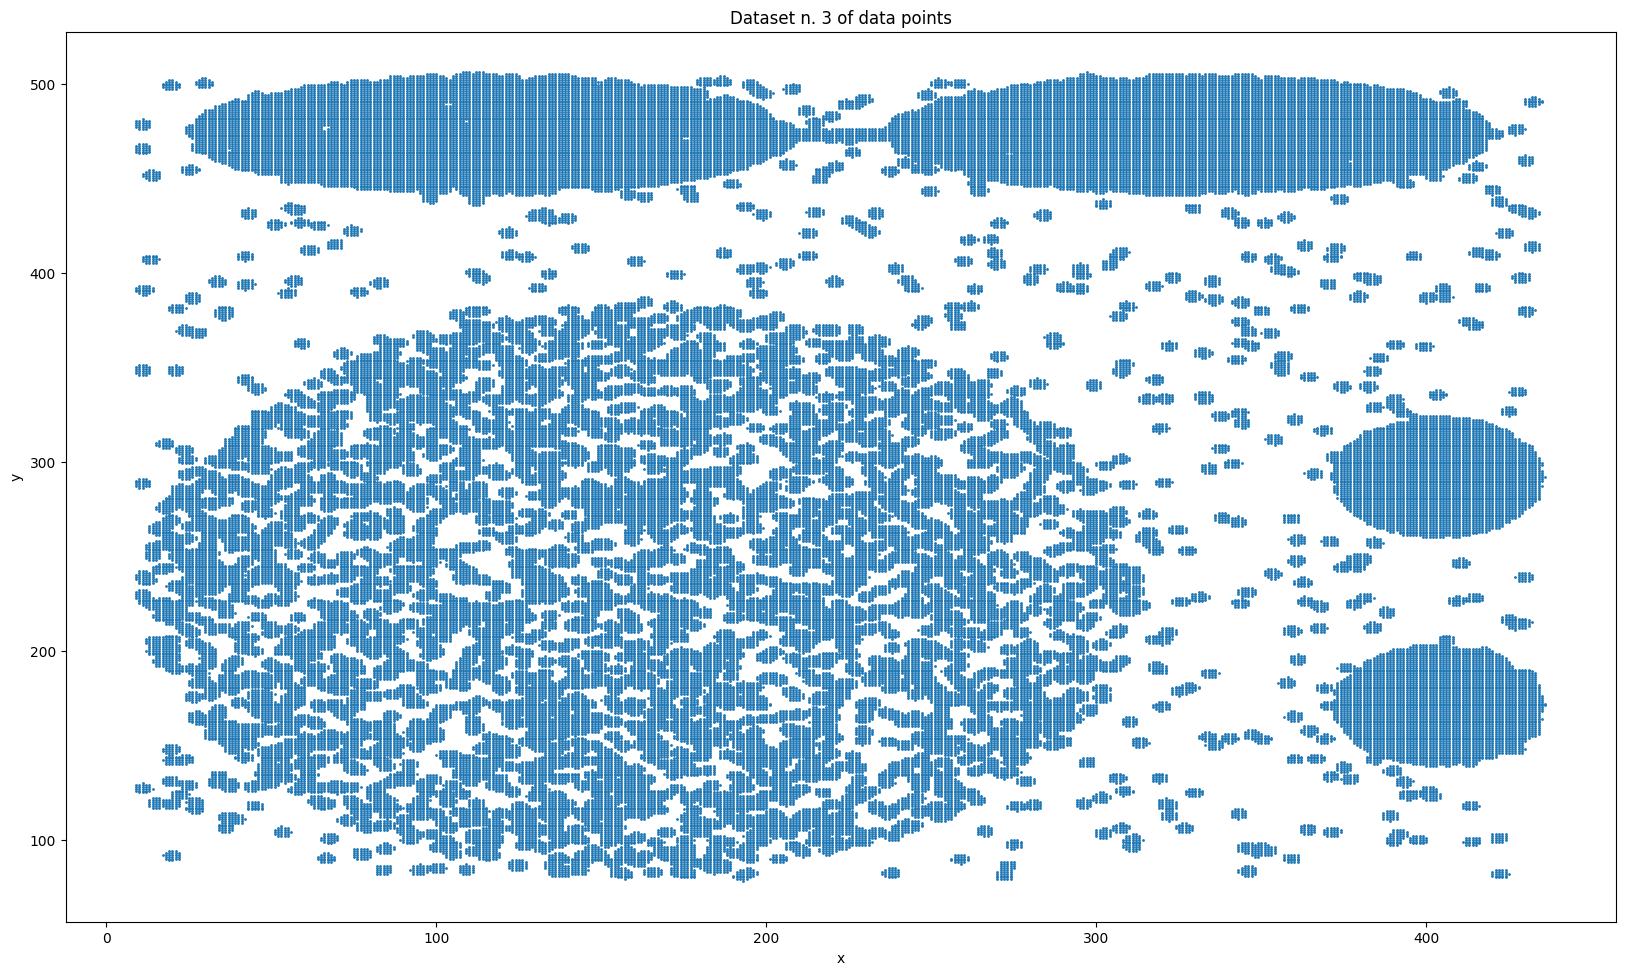

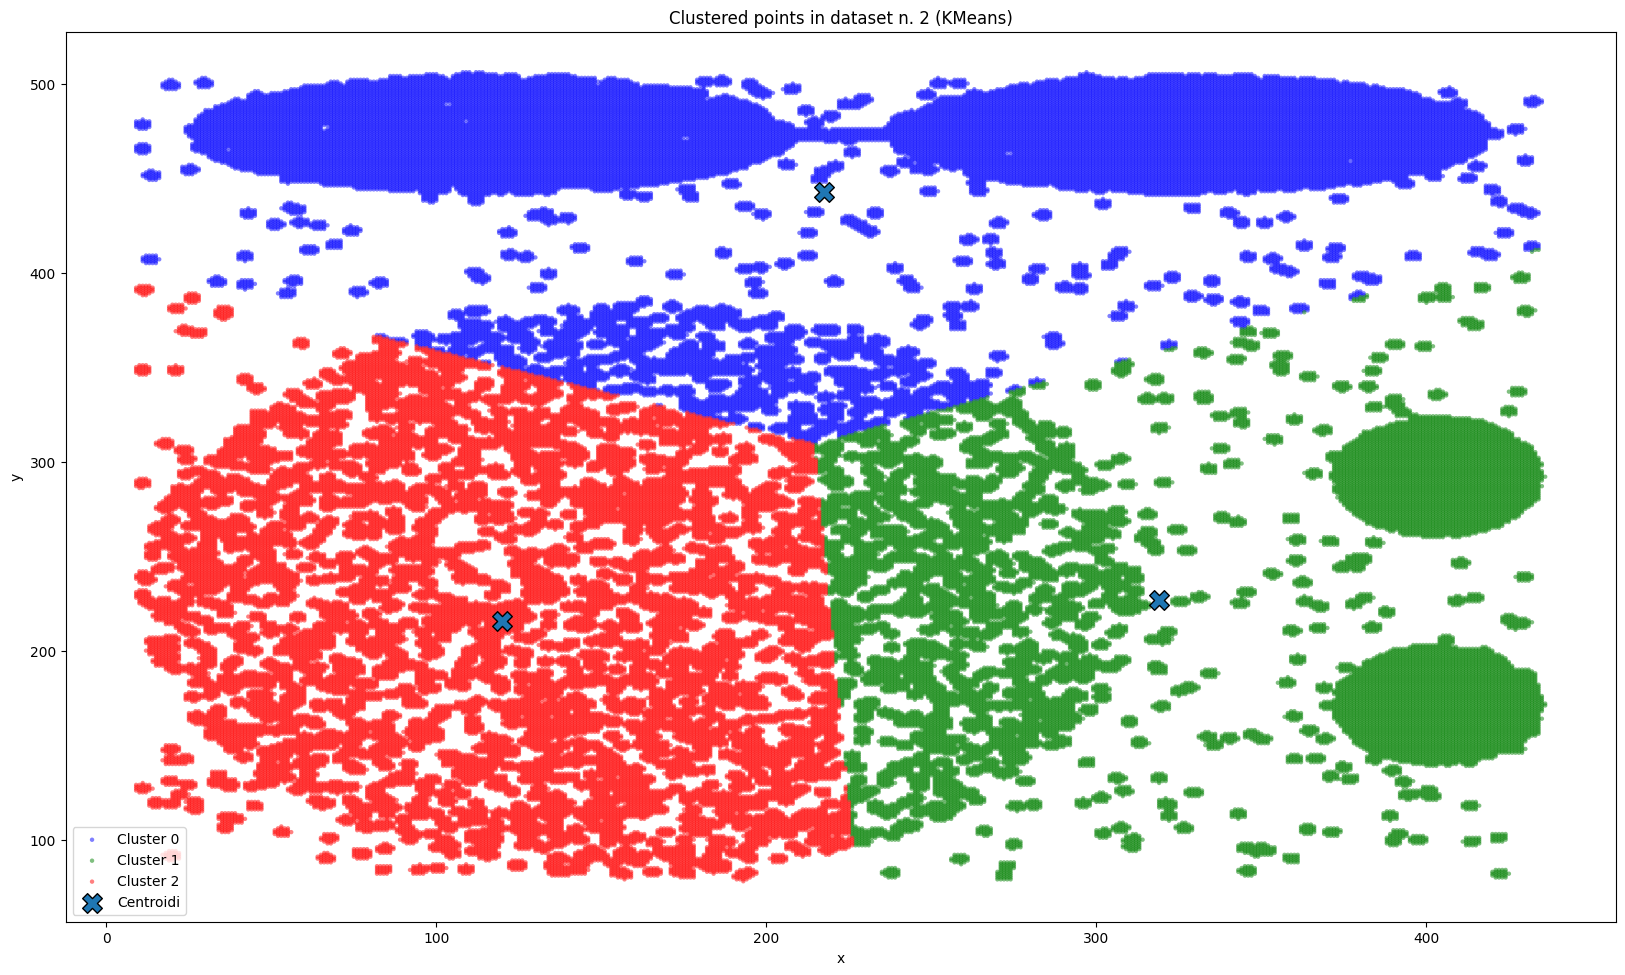

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset3_raw(dataset3: np.ndarray, feature_names3=None):
    """
    Plot del dataset2 non clusterizzato.
    """
    if feature_names3 is None:
        feature_names3 = ["x", "y"]

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)

    ax.set_title("Dataset n. 3 of data points")
    ax.set_xlabel(feature_names3[0])
    ax.set_ylabel(feature_names3[1])

    plt.plot(dataset3[:, 0], dataset3[:, 1], ".", markersize=2)
    plt.show()


def plot_dataset3_clustered(dataset3: np.ndarray, results_file: str = "kmeans_dataset2_results.npz", feature_names3=None):
    """
    Plot del dataset2 clusterizzato usando labels/centroidi salvati.
    """
    if feature_names3 is None:
        feature_names3 = ["x", "y"]

    data = np.load(results_file, allow_pickle=True)
    labels = data["labels"]
    centers = data["centers"]
    k = int(data["k"][0])

    n_rows = dataset3.shape[0]
    if labels.shape[0] != n_rows:
        raise ValueError("Numero labels diverso dal numero di righe di dataset2. Hai cambiato dataset2 dopo il fit?")

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)

    ax.set_title("Clustered points in dataset n. 2 (KMeans)")
    ax.set_xlabel(feature_names3[0])
    ax.set_ylabel(feature_names3[1])

    # lista colori (come nel tuo esempio)
    color = ["b", "g", "r", "c", "m", "y", "k"]

    for clu in range(k):
        data_list_x = [dataset2[i, 0] for i in range(n_rows) if labels[i] == clu]
        data_list_y = [dataset2[i, 1] for i in range(n_rows) if labels[i] == clu]
        plt.scatter(data_list_x, data_list_y, s=10, edgecolors="none", c=color[clu % len(color)], alpha=0.5, label=f"Cluster {clu}")

    # centroidi
    plt.scatter(centers[:, 0], centers[:, 1], marker="X", s=200, edgecolors="black", linewidths=1.0, label="Centroidi")

    plt.legend()
    plt.show()

plot_dataset3_raw(dataset3_np, feature_names3)
plot_dataset3_clustered(dataset3_np, "kmeans_dataset3_results.npz", feature_names3)


In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from os.path import join

def best_kmeans_by_silhouette(X, k, n_runs=10, base_seed=0):
    """
    Esegue KMeans n_runs volte e seleziona la soluzione con Silhouette Score migliore.

    Parametri:
    - X: dati (numpy array) shape (n_samples, n_features)
    - k: numero di cluster
    - n_runs: numero di esecuzioni indipendenti (es. 10)
    - base_seed: seed di partenza per rendere riproducibile l'esperimento

    Ritorna:
    - best_model: il modello KMeans migliore
    - best_labels: etichette dei cluster della soluzione migliore
    - best_score: silhouette score migliore ottenuto
    - all_scores: lista di tutti i punteggi silhouette delle n_runs
    """
    # Se X non è numpy array, provo a convertirlo (utile se è un DataFrame)
    X = np.asarray(X)

    best_score = -1.0
    best_model = None
    best_labels = None
    all_scores = []

    for i in range(n_runs):
        seed = base_seed + i

        # n_init esplicitato per stabilità tra versioni sklearn
        model = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels = model.fit_predict(X)

        # Silhouette è definita solo se ci sono almeno 2 cluster effettivi
        # (se KMeans collassa su un solo cluster, silhouette non ha senso)
        if len(set(labels)) < 2:
            score = -1.0
        else:
            score = silhouette_score(X, labels)

        all_scores.append(score)

        # Tengo la migliore soluzione
        if score > best_score:
            best_score = score
            best_model = model
            best_labels = labels

    return best_model, best_labels, best_score, all_scores

# Esempio: stessi k che usavi prima (modifica se richiesto dalla consegna)
k1 = 3
k2 = 3
k3 = 3

file_path="../datasets/clustering/"
file_name1="3-clusters.csv"
df1 = pd.read_csv(join(file_path, file_name1))
feature_names1=df1.columns.tolist()
dataset1 = df1.values
file_name2="dataset-DBSCAN.csv"
dataset2 = pd.read_csv(join(file_path, file_name2))
df2 = pd.read_csv(join(file_path, file_name2))
feature_names2=df2.columns.tolist()
dataset2 = df2.values
file_name3="CURE-complete.csv"
df3 = pd.read_csv(join(file_path, file_name3))
feature_names3=df3.columns.tolist()
dataset3 = df3.values

# Dataset1
model1, labels1, best_s1, scores1 = best_kmeans_by_silhouette(dataset1, k=k1, n_runs=10, base_seed=0)
print(f"Dataset1 -> k={k1} | Best Silhouette = {best_s1:.4f} | Scores (10 run) = {np.round(scores1, 4)}")

# Dataset2
model2, labels2, best_s2, scores2 = best_kmeans_by_silhouette(dataset2, k=k2, n_runs=10, base_seed=0)
print(f"Dataset2 -> k={k2} | Best Silhouette = {best_s2:.4f} | Scores (10 run) = {np.round(scores2, 4)}")

# Dataset3 (se è un DataFrame, la funzione lo converte già)
model3, labels3, best_s3, scores3 = best_kmeans_by_silhouette(dataset3, k=k3, n_runs=10, base_seed=0)
print(f"Dataset3 -> k={k3} | Best Silhouette = {best_s3:.4f} | Scores (10 run) = {np.round(scores3, 4)}")


Dataset1 -> k=3 | Best Silhouette = 0.7229 | Scores (10 run) = [0.7229 0.7229 0.7229 0.7229 0.7229 0.7229 0.7229 0.7229 0.7229 0.7229]
Dataset2 -> k=3 | Best Silhouette = 0.4799 | Scores (10 run) = [0.4799 0.4799 0.4799 0.4799 0.4799 0.4799 0.4797 0.4799 0.4799 0.4797]
Dataset3 -> k=3 | Best Silhouette = 0.3910 | Scores (10 run) = [0.3909 0.3909 0.3909 0.3909 0.3909 0.3909 0.3909 0.391  0.3909 0.3909]


Plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

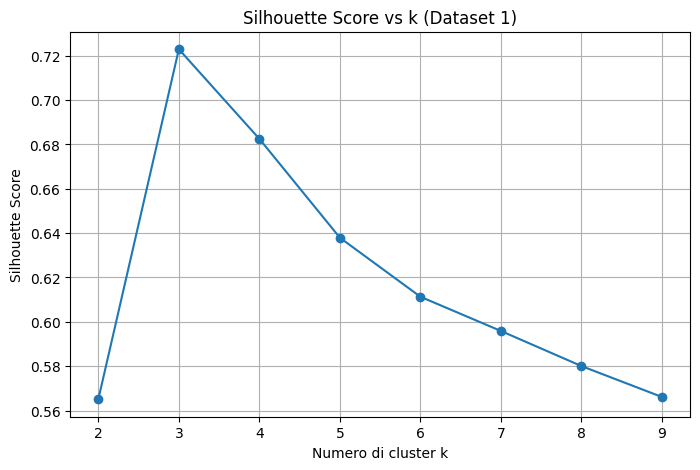

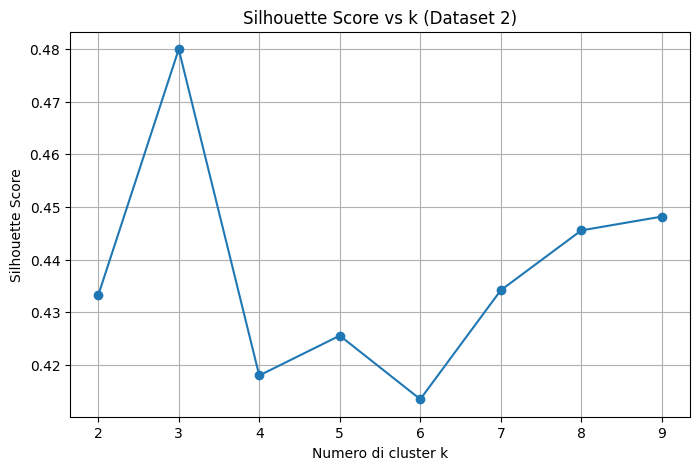

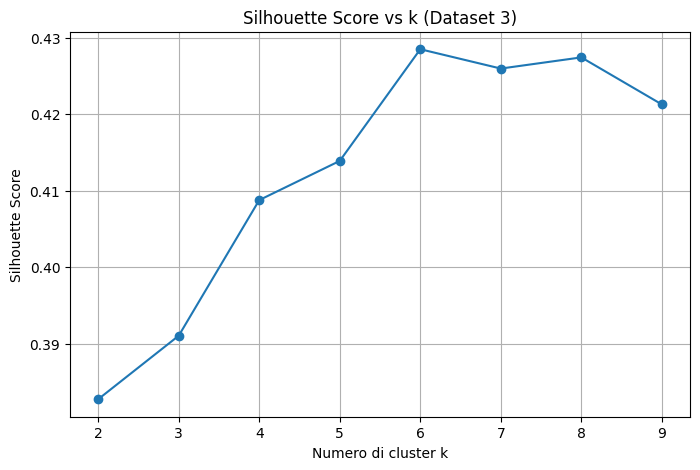

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_silhouette_vs_k(X, k_range, n_runs=10, base_seed=0, dataset_name="dataset"):
    """
    Plotta la silhouette media (o migliore) al variare di k.

    Parametri:
    - X: dati (numpy array) shape (n_samples, n_features)
    - k_range: lista o range di valori di k (es. range(2, 10))
    - n_runs: numero di esecuzioni KMeans per ogni k
    - base_seed: seed iniziale
    - dataset_name: nome del dataset (solo per titolo)
    """

    X = np.asarray(X)
    silhouette_values = []

    for k in k_range:
        best_silhouette = -1.0

        for i in range(n_runs):
            seed = base_seed + i
            kmeans = KMeans(
                n_clusters=k,
                random_state=seed,
                n_init=10
            )
            labels = kmeans.fit_predict(X)

            # Silhouette definita solo se esistono almeno 2 cluster effettivi
            if len(set(labels)) > 1:
                score = silhouette_score(X, labels)
                best_silhouette = max(best_silhouette, score)

        silhouette_values.append(best_silhouette)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(list(k_range), silhouette_values, marker='o')
    plt.xlabel("Numero di cluster k")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score vs k ({dataset_name})")
    plt.grid(True)
    plt.show()

    return silhouette_values

k_values = range(2, 10)
sil1 = plot_silhouette_vs_k(
    dataset1,
    k_range=k_values,
    n_runs=10,
    dataset_name="Dataset 1"
)

sil2 = plot_silhouette_vs_k(
    dataset2,
    k_range=k_values,
    n_runs=10,
    dataset_name="Dataset 2"
)

sil3 = plot_silhouette_vs_k(
    dataset3,
    k_range=k_values,
    n_runs=10,
    dataset_name="Dataset 3"
)



In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3.

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

0.0 211.07039200757146 544.474058151534
Numero punti usati: 8655
Numero di cluster trovati: 0
Numero di punti rumore: 8655


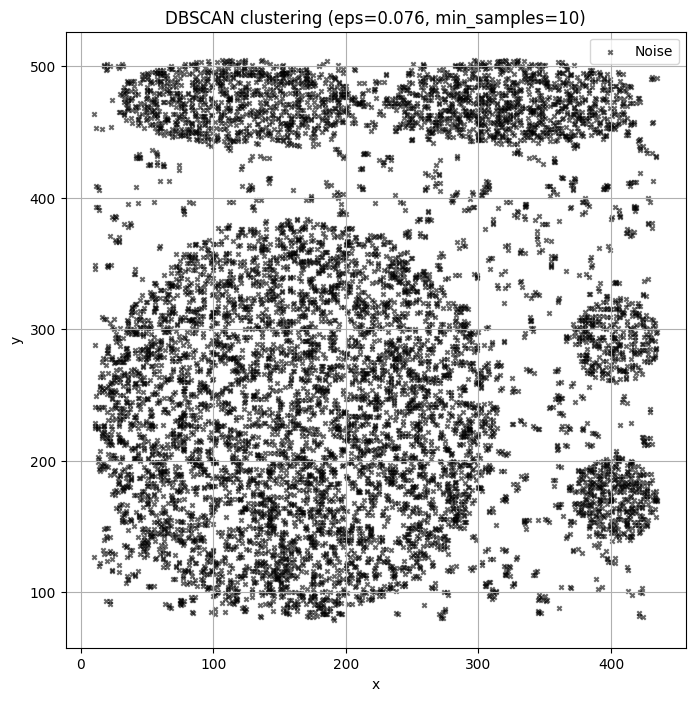

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# =========================
# 1) Scelgo il dataset
# =========================
# Uso dataset3 (puoi sostituire con dataset2)
X = np.asarray(dataset3)

# =========================
# 2) Sampling (se dataset grande)
# =========================
sampling_factor = 0.1   # 10% dei dati

if X.shape[0] > 5000:   # soglia ragionevole
    np.random.seed(42)
    idx = np.random.choice(
        X.shape[0],
        size=int(X.shape[0] * sampling_factor),
        replace=False
    )
    X_sampled = X[idx]
else:
    X_sampled = X



d = pairwise_distances(X_sampled[:1000])
print(d.min(), d.mean(), d.max())

print("Numero punti usati:", X_sampled.shape[0])

# =========================
# 3) Parametri DBSCAN (prima scelta)
# =========================
eps = 0.076
min_pts = 10

dbscan = DBSCAN(
    eps=eps,
    min_samples=min_pts
)

labels = dbscan.fit_predict(X_sampled)

# =========================
# 4) Analisi risultati
# =========================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Numero di cluster trovati:", n_clusters)
print("Numero di punti rumore:", n_noise)

# =========================
# 5) Plot clustering DBSCAN
# =========================
plt.figure(figsize=(8, 8))

unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for lab in unique_labels:
    if lab == -1:
        # Rumore → nero
        col = 'k'
        marker = 'x'
        label_name = 'Noise'
    else:
        col = colors[lab % len(colors)]
        marker = 'o'
        label_name = f'Cluster {lab}'

    points = X_sampled[labels == lab]
    plt.scatter(
        points[:, 0],
        points[:, 1],
        c=col,
        marker=marker,
        s=10,
        label=label_name,
        alpha=0.6
    )

plt.title(f"DBSCAN clustering (eps={eps}, min_samples={min_pts})")
plt.xlabel(feature_names3[0])
plt.ylabel(feature_names3[1])
plt.legend()
plt.grid(True)
plt.show()



In the following cell I propose you to:

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

Numero punti usati: 8655


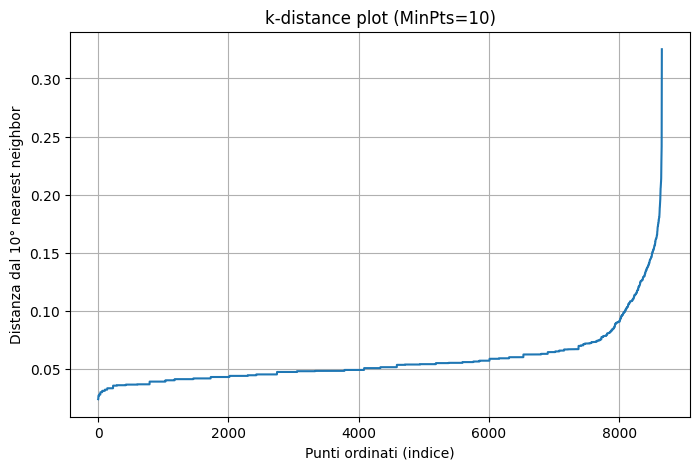

Indice elbow stimato: 7724
eps stimato (MinPts=10): 0.0755


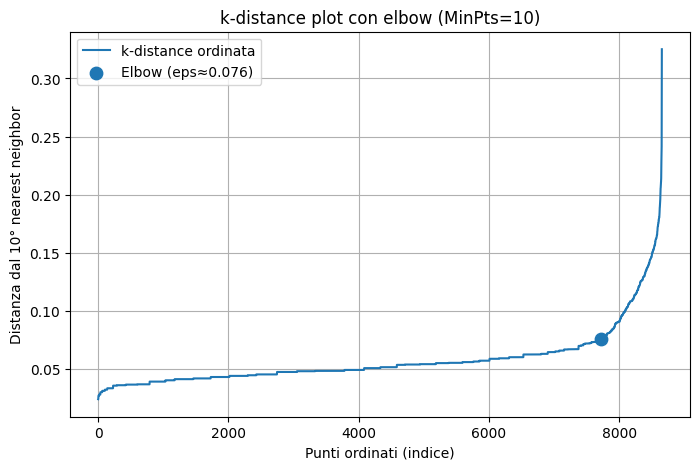

Numero cluster trovati: 19
Numero punti rumore: 582


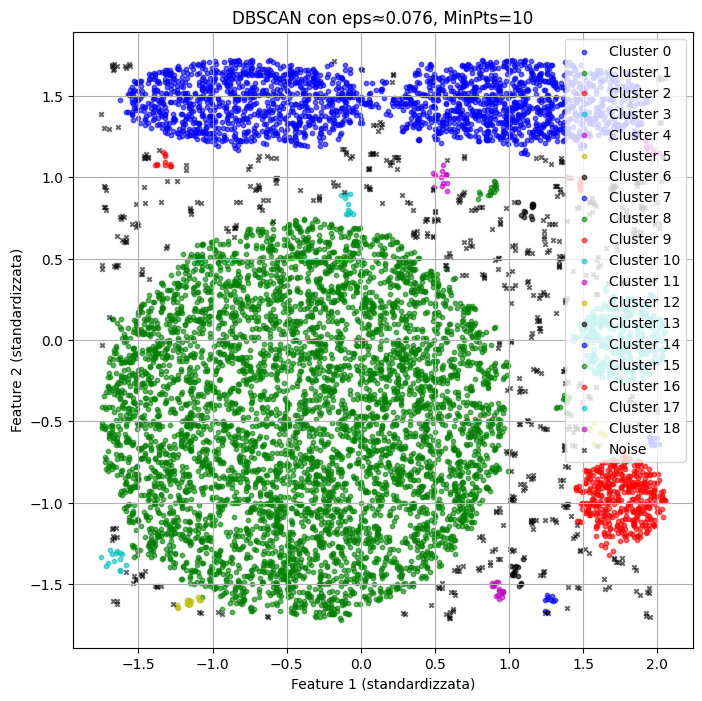

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# =========================
# 0) Scelgo dataset (2 oppure 3)
# =========================
X = np.asarray(dataset3)   # oppure dataset2

# =========================
# 1) Sampling se il dataset è grande (fattore 0.1)
# =========================
sampling_factor = 0.1

if X.shape[0] > 5000:
    np.random.seed(42)
    idx = np.random.choice(X.shape[0], size=int(X.shape[0] * sampling_factor), replace=False)
    X_sampled = X[idx]
else:
    X_sampled = X

print("Numero punti usati:", X_sampled.shape[0])

# =========================
# 2) Standardizzazione (fortemente consigliata)
# =========================
# DBSCAN è sensibile alla scala: standardizzo per rendere eps interpretabile.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

# =========================
# 3) Imposto MinPts = 10
# =========================
min_pts = 10

# =========================
# 4) Calcolo la distanza del 10° nearest neighbor per ogni punto
# =========================
# Nota: uso n_neighbors = min_pts (10)
# kneighbors restituisce distanze ordinate per vicinanza: la colonna [-1] è la distanza del 10° vicino.
nbrs = NearestNeighbors(n_neighbors=min_pts)
nbrs.fit(X_scaled)

distances, indices = nbrs.kneighbors(X_scaled)

# Distanza del 10° vicino (k=10): ultimo elemento di ogni riga
k_distances = distances[:, -1]

# =========================
# 5) Ordino le distanze in modo crescente
# =========================
k_distances_sorted = np.sort(k_distances)

# =========================
# 6) Plot delle distanze ordinate (k-distance plot)
# =========================
plt.figure(figsize=(8, 5))
plt.plot(k_distances_sorted)
plt.xlabel("Punti ordinati (indice)")
plt.ylabel(f"Distanza dal {min_pts}° nearest neighbor")
plt.title(f"k-distance plot (MinPts={min_pts})")
plt.grid(True)
plt.show()

# =========================
# 7) Stima semplice dell'elbow (opzionale ma utile)
# =========================
# Metodo pratico: cerco il punto di massima "curvatura" rispetto a una linea tra inizio e fine.
# Non è perfetto matematicamente, ma va benissimo come scelta automatica "da esercitazione".

# Creo la linea tra primo e ultimo punto
n = len(k_distances_sorted)
all_idx = np.arange(n)

start = np.array([0, k_distances_sorted[0]])
end = np.array([n - 1, k_distances_sorted[-1]])

line_vec = end - start
line_vec_norm = line_vec / np.linalg.norm(line_vec)

# Distanza di ogni punto dalla linea (formula del punto-linea)
points = np.vstack((all_idx, k_distances_sorted)).T
vec_from_start = points - start

# Proiezione sulla linea e distanza ortogonale
proj_len = vec_from_start.dot(line_vec_norm)
proj_point = np.outer(proj_len, line_vec_norm) + start
dist_to_line = np.linalg.norm(points - proj_point, axis=1)

elbow_idx = np.argmax(dist_to_line)
eps_estimated = k_distances_sorted[elbow_idx]

print(f"Indice elbow stimato: {elbow_idx}")
print(f"eps stimato (MinPts={min_pts}): {eps_estimated:.4f}")

# Evidenzio graficamente l'elbow
plt.figure(figsize=(8, 5))
plt.plot(k_distances_sorted, label="k-distance ordinata")
plt.scatter(elbow_idx, eps_estimated, s=80, label=f"Elbow (eps≈{eps_estimated:.3f})")
plt.xlabel("Punti ordinati (indice)")
plt.ylabel(f"Distanza dal {min_pts}° nearest neighbor")
plt.title(f"k-distance plot con elbow (MinPts={min_pts})")
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 8) Provo DBSCAN con MinPts=10 ed eps = elbow stimato
# =========================
dbscan = DBSCAN(eps=eps_estimated, min_samples=min_pts)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Numero cluster trovati:", n_clusters)
print("Numero punti rumore:", n_noise)

# =========================
# 9) Plot DBSCAN (su dati standardizzati)
# =========================
plt.figure(figsize=(8, 8))

unique_labels = set(labels)
colors = ['b','g','r','c','m','y','k']

for lab in unique_labels:
    if lab == -1:
        col = 'k'
        marker = 'x'
        name = "Noise"
    else:
        col = colors[lab % len(colors)]
        marker = 'o'
        name = f"Cluster {lab}"

    pts = X_scaled[labels == lab]
    plt.scatter(pts[:, 0], pts[:, 1], c=col, marker=marker, s=10, alpha=0.6, label=name)

plt.title(f"DBSCAN con eps≈{eps_estimated:.3f}, MinPts={min_pts}")
plt.xlabel("Feature 1 (standardizzata)")
plt.ylabel("Feature 2 (standardizzata)")
plt.legend()
plt.grid(True)
plt.show()
